# How to use SIMuRG on examples via Python 3

First of all this packages should be installed:

1. os
2. json
3. requests
4. h5py
5. numpy
6. matplotlib
7. urllib
8. cartopy

You can install its by:

if you use Anaconda - 'conda install <package_name>'

or via 'pip' - 'pip install <package_name>'


# SIMuRG API for everybody

SIMuRG API is amazing tool for automatization your usage of SIMuRG.

Here we show how to:
1. Check query status via SIMuRG API
2. Download query data via SIMuRG API

In [9]:
#Including necessary packages
import json
import requests
import os
from urllib.request import urlretrieve

In [10]:
#Checking on queries function
def checking_by_mail(mail):
    """
    checking all accessible information about queries made by <mail>
    input - <mail> string type email address to check
    output - list of dictionaries with all information about every query
    """
    rq = requests.post("https://simurg.iszf.irk.ru/api", 
                        json={"method": "check", 
                        "args": {"email": mail}
                              }
                        )
    return rq.json()

In [11]:
#Showing results for email
email = 'artem_vesnin@iszf.irk.ru'
for i in checking_by_mail(email):
    print(i)

{'id': '62e3ba1f7e0ad2eb69980d4f', 'created': '2022-07-29 10:44:47', 'begin': '2021-07-17 00:00', 'end': '2021-07-19 23:59', 'type': 'series', 'product_type': '2-10 minute TEC variations', 'status': 'done', 'message': '', 'progress': {'total': 3, 'processing': [3, 0], 'plot': [0, 0]}, 'paths': {'image': '2/simurg/simurg/user_temp/dtec_2_10_2021_198_abd2.png', 'movie': '', 'data': '2/simurg/simurg/user_temp/dtec_2_10_2021_198_abd2.h5', 'zippng': '2/simurg/simurg/user_temp/dtec_2_10_2021_198_abd2.zip'}, 'options': {'vmin': None, 'vmax': None, 'timestep': 300, 'cmap': 'jet', 'format': 'hdf5', 'movie_quality': 'low', 'aspect': 'equal', 'grid': 'subionospheric points', 'product_type': 'dtec_2_10', 'marker_size': 'auto', 'systems': [], 'subsolar': False, 'mageq': False, 'thingrid': 'none', 'gridstep': 1000, 'cutoff': 10, 'roti_type': 'simple', 'navs': None, 'gims': []}, 'site': 'irkj'}


In [46]:
#Function to show progrees of downloading data
def progress_print(count, block_size, total_size):
    prc = (count * block_size) / (total_size / 100)
    print("{0:3d}/100%".format(int(prc)), end='\r')

#Function to downloading data in same path as notebook 
def download_data(query,type_q, download_type, download_path):
    """
    downloading data based on query dictionary
    input - <query> query dictionary, 
            <type_q> string type what type of query download (either 'series' or 'map'), 
            <download_t> string type what to download ('zip' zip archive of maps/series or 'h5' all data in hdf type)
    output - Results of downloading
    """    

    if query['type'] == type_q and query['status'] == 'done':
        directory = download_path
        os.makedirs(directory, exist_ok=True)
        file_name = 'data_'+query['id']+'.'+download_type
        if download_type == 'h5':
            url = "https://simurg.iszf.irk.ru/files"+query['paths']['data']
            print(url)
            urlretrieve(url, os.path.join(directory,file_name), reporthook=progress_print)
        else:
            url = "https://simurg.iszf.irk.ru/files"+query['paths']['zippng']
            urlretrieve(url, os.path.join(directory,file_name), reporthook=progress_print)
        if file_name in os.listdir(directory):
            print("Downloaded as "+file_name+"!")
            return file_name
        else:
            print("Mistake occurs!")
            return ''
    else:
        print("Nothing to Download!")
        return ''

# SIMuRG Series for everybody
Here we show how to:

1. Use data provided by SIMuRG series 
2. Visualizate this data

In [85]:
#Including necessary packages
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import datetime
from pathlib import Path

In [86]:
email = 'artem_vesnin@iszf.irk.ru'
data_path = '/tmp/simurg_data'
data_files = []
for query in checking_by_mail(email):
    print('id:', query['id'],
          'type:', query['type'],
          'status:', query['status'],
          'site:', query['site'])
    f = download_data(query,'series', 'h5', data_path)
    if f != '':
        data_files.append(Path(data_path) / f)

id: 637490595fc226bd8cca4890 type: series status: done site: irkj
https://simurg.iszf.irk.ru/files2/simurg/simurg/user_temp/dtec_2_10_2021_308_0b9e.h5
Downloaded as data_637490595fc226bd8cca4890.h5!


In [87]:
#Function to unpack series data for satellite 
def taking_data_series(file, sat, type_d):  
    f_in = h5py.File(file, 'r')
    for site in f_in:
        print(site)
        print(f_in[site].keys())
        if sat in f_in[site]: 
            print(f_in[site][sat].keys())
            timestamp = f_in[site][sat]['timestamp'][:]
            data = f_in[site][sat][type_d][:]
            f_in.close()
            return np.array([timestamp,data])
        else:
            return np.array([])        

/tmp/simurg_data/data_637490595fc226bd8cca4890.h5
irkj
<KeysViewHDF5 ['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G30', 'G31', 'G32', 'R01', 'R02', 'R04', 'R05', 'R08', 'R13', 'R14', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R24']>
<KeysViewHDF5 ['azimuth', 'dtec_10_20', 'dtec_20_60', 'dtec_2_10', 'elevation', 'roti', 'sip_larc', 'sip_lat', 'sip_lon', 'tec', 'tec_adjusted', 'timestamp']>


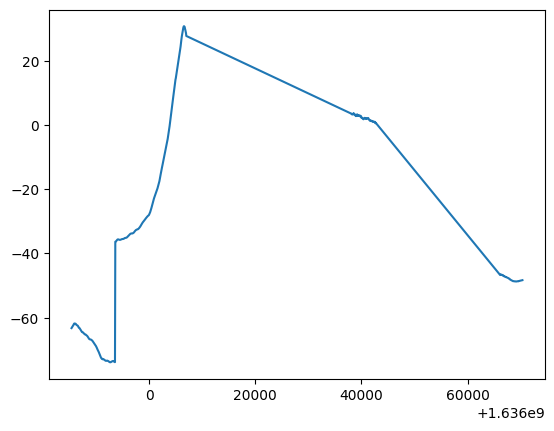

In [88]:
#Use already downloaded file 'example.h5'.  
file = data_files[0]
print(file)
sat = 'R05'
type_d = 'tec'
data = taking_data_series(file, sat, type_d)
times = data[0][:]
vals = data[1][:]
plt.plot(times, vals)

In [89]:
#Set parameters of matplotlib.pyplot for future figures
def params():
    plt.rcParams.update({'font.size': 25,
                     'font.family': 'sans-serif',
                     'axes.linewidth': 1.5,
                     'xtick.major.pad': 5,
                     'ytick.major.pad': 5,   
                     'xtick.major.width' : 1.5,
                     'ytick.major.width' : 1.5,
                     'xtick.minor.width' : 1.5,
                     'ytick.minor.width' : 1.5,
                     'axes.titlesize' : 35,
                     'axes.labelsize' : 35,
                     'xtick.labelsize' : 20,
                     'ytick.labelsize' : 35})
    return 0

#Change format of time from timestamp to datetime
def timestamp_to_datetime(timestamp):
    """
    Switch time from timestamp to datetime
    input - <timestamp> numpy array time in timestamp
    output - numpy array time in datetime
    """  
    return np.array([datetime.datetime.fromtimestamp(t) for t in timestamp])

#Function to plot data
def data_plotter(data, type_d):
    """
    Plotting data
    input - <data> numpy array [timestamp, product] 
            <type_d> string type name of product
    output - figures
    """  
    params()
    ind = np.where(np.diff(data[0]) > 120)[0]
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,10))
    if len(ind) > 0:
        for j in range(len(ind)+1):
            if j > 0 and j < len(ind):
                timestamp = timestamp_to_datetime(data[0][ind[j-1]+1:ind[j]])
                ax.plot(timestamp,data[1][ind[j-1]+1:ind[j]],
                         linewidth = 5, color = 'red')
            elif j == 0:
                timestamp = timestamp_to_datetime(data[0][0:ind[j]])
                ax.plot(timestamp,data[1][0:ind[j]],
                         linewidth = 5, color = 'red')
            else:
                timestamp = timestamp_to_datetime(data[0][ind[j-1]+1:])
                ax.plot(timestamp,data[1][ind[j-1]+1:],
                         linewidth = 5, color = 'red')
    else:
        timestamp = timestamp_to_datetime(data[0])
        ax.plot(timestamp,data[1], 
                 linewidth = 5, color = 'red')
    ax.grid(linestyle = '--',color = 'black', linewidth = 2.8)
    if type_d != 'roti':
        ax.set_ylabel(type_d.upper().replace('_',' ')+', TECu')
    else:
        ax.set_ylabel(type_d.upper().replace('_','')+', TECu/min')    
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(dt.DateFormatter("%y-%m-%d\n%H:%M"))
    plt.show()
    plt.close()
    plt.rcdefaults()
    return print('Plotted!')

irkj
<KeysViewHDF5 ['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G30', 'G31', 'G32', 'R01', 'R02', 'R04', 'R05', 'R08', 'R13', 'R14', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R24']>
<KeysViewHDF5 ['azimuth', 'dtec_10_20', 'dtec_20_60', 'dtec_2_10', 'elevation', 'roti', 'sip_larc', 'sip_lat', 'sip_lon', 'tec', 'tec_adjusted', 'timestamp']>


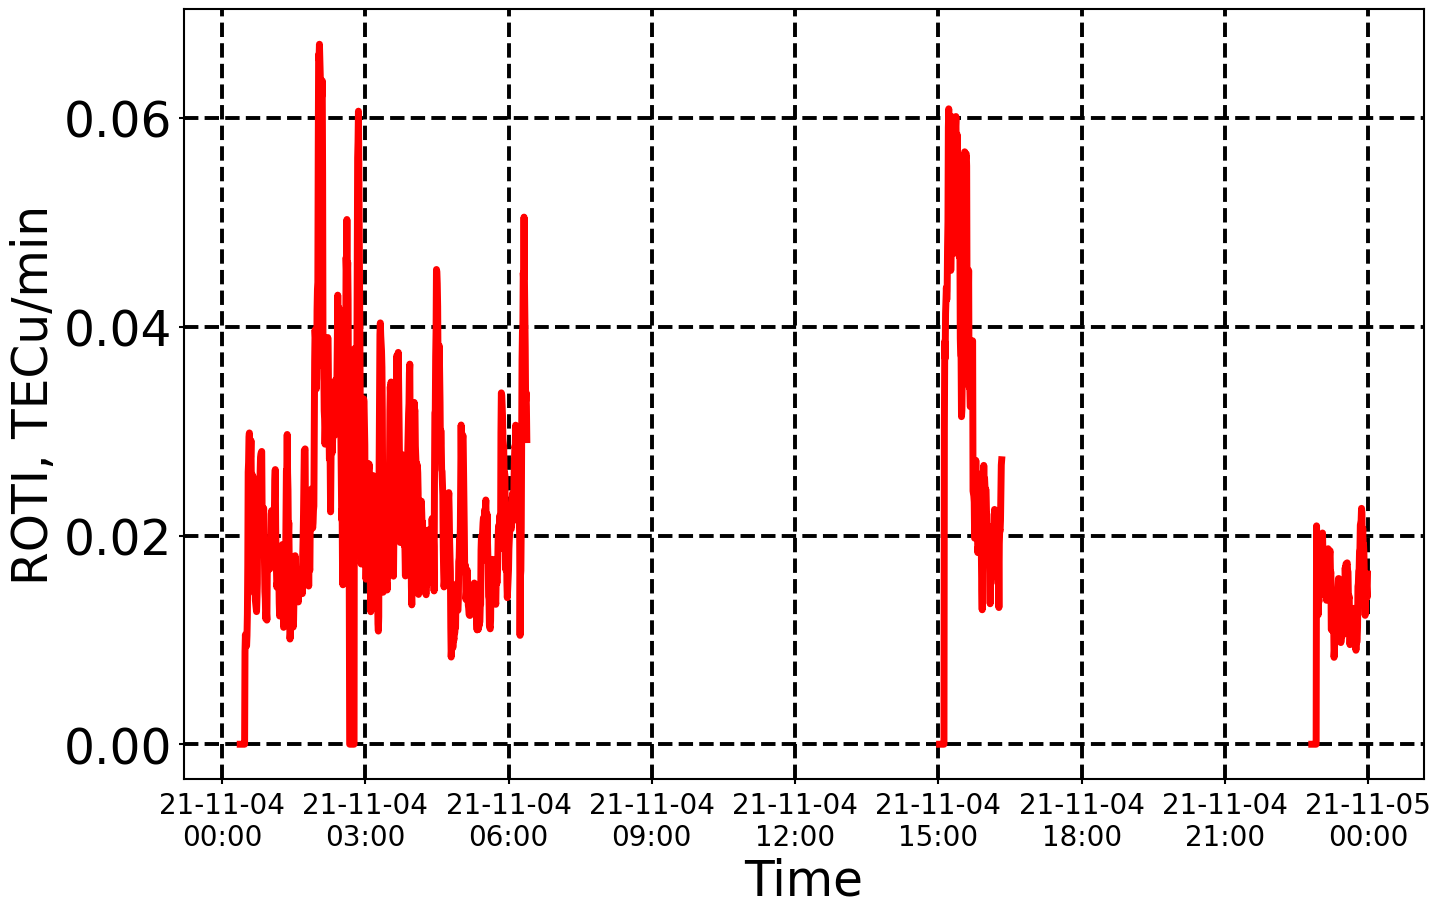

Plotted!
irkj
<KeysViewHDF5 ['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G30', 'G31', 'G32', 'R01', 'R02', 'R04', 'R05', 'R08', 'R13', 'R14', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R24']>
<KeysViewHDF5 ['azimuth', 'dtec_10_20', 'dtec_20_60', 'dtec_2_10', 'elevation', 'roti', 'sip_larc', 'sip_lat', 'sip_lon', 'tec', 'tec_adjusted', 'timestamp']>


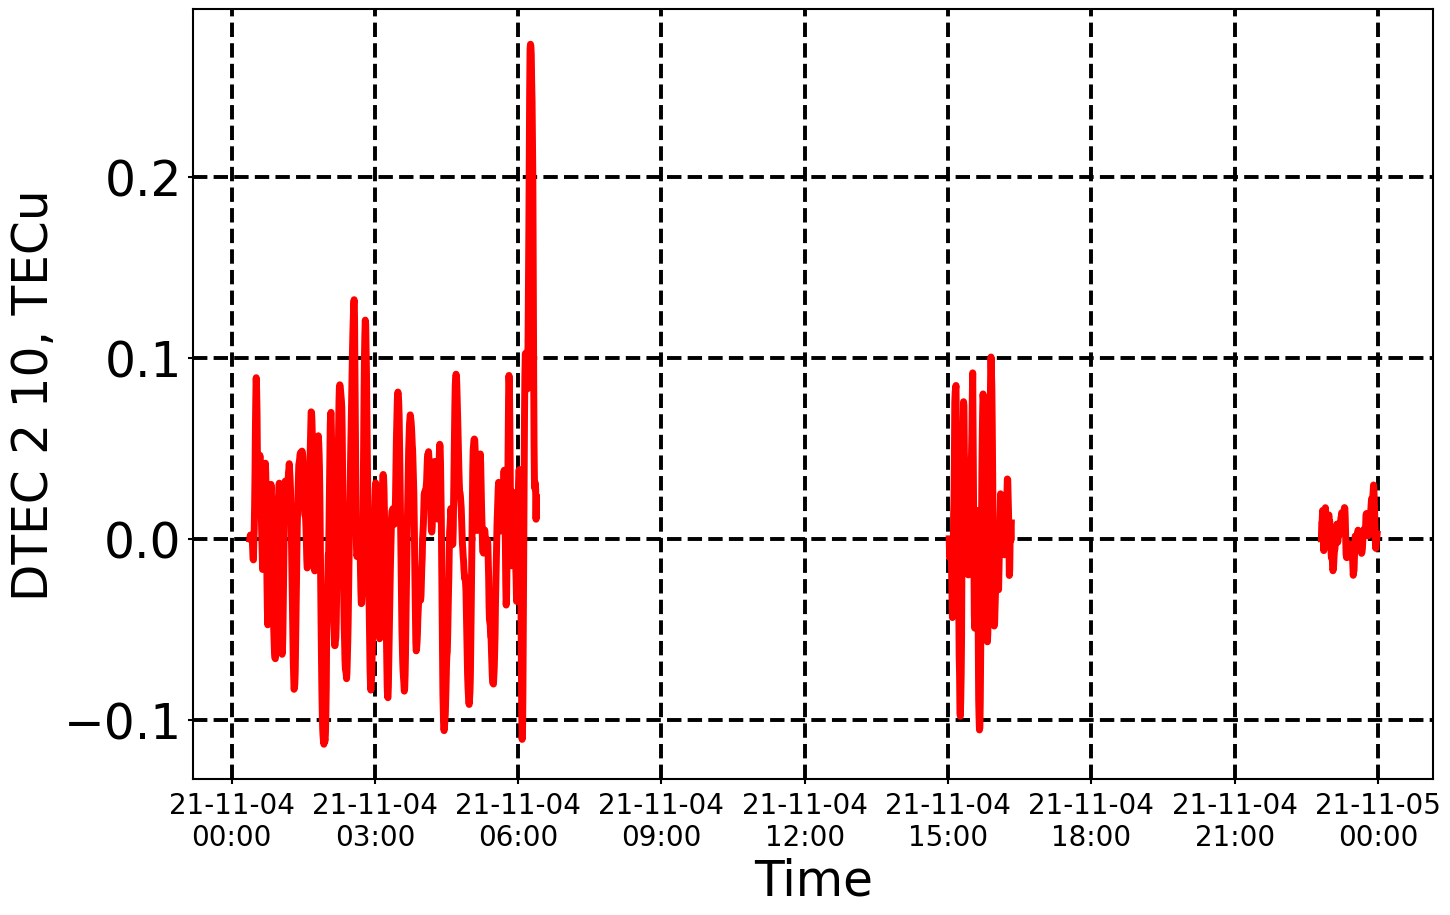

Plotted!
irkj
<KeysViewHDF5 ['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G30', 'G31', 'G32', 'R01', 'R02', 'R04', 'R05', 'R08', 'R13', 'R14', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R24']>
<KeysViewHDF5 ['azimuth', 'dtec_10_20', 'dtec_20_60', 'dtec_2_10', 'elevation', 'roti', 'sip_larc', 'sip_lat', 'sip_lon', 'tec', 'tec_adjusted', 'timestamp']>


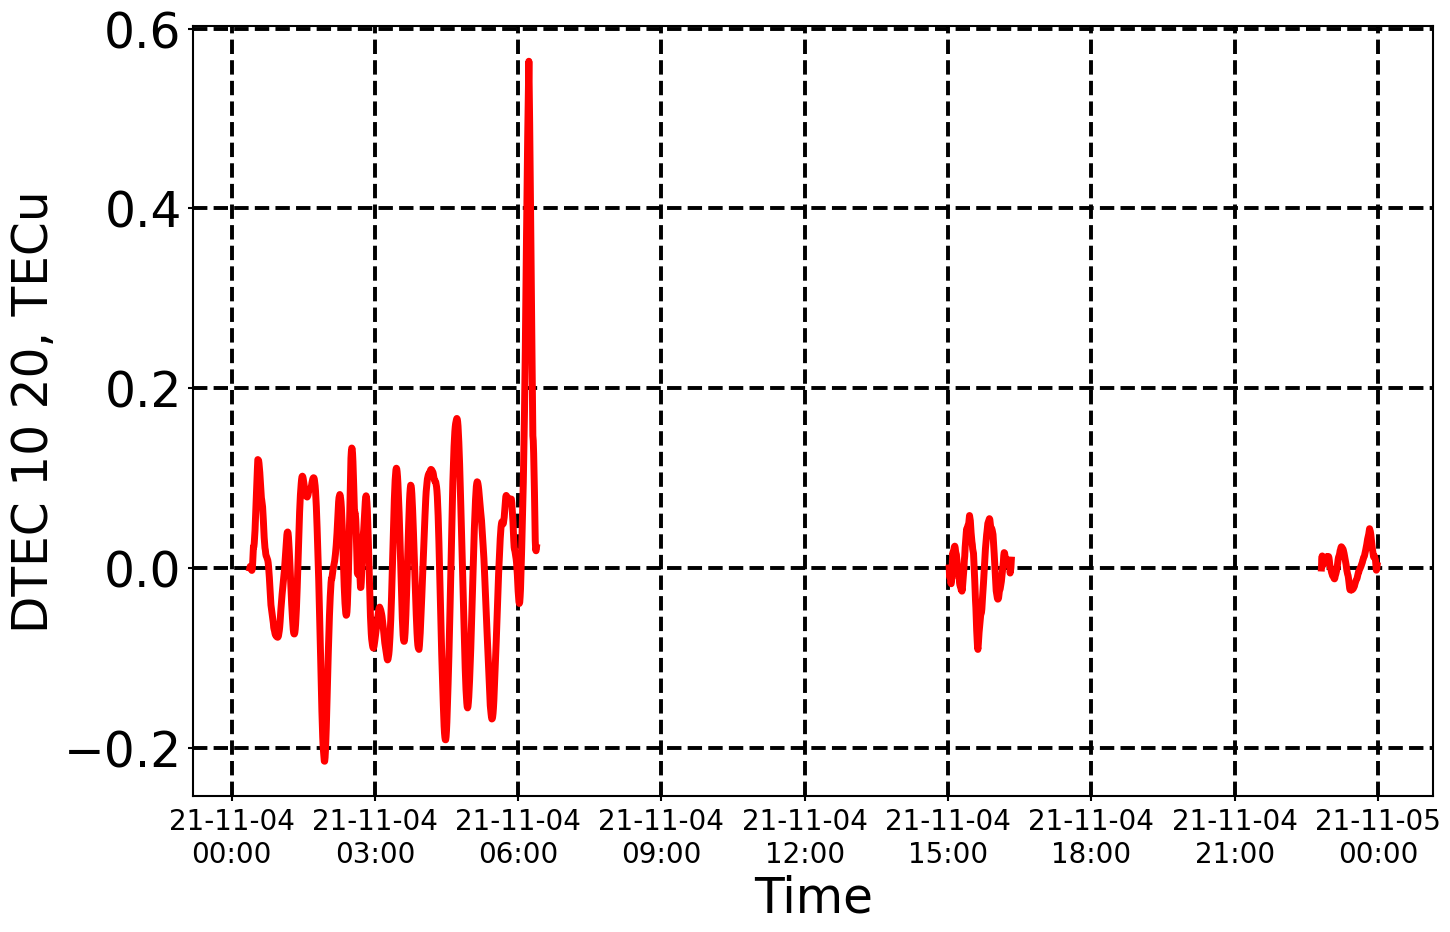

Plotted!
irkj
<KeysViewHDF5 ['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G30', 'G31', 'G32', 'R01', 'R02', 'R04', 'R05', 'R08', 'R13', 'R14', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R24']>
<KeysViewHDF5 ['azimuth', 'dtec_10_20', 'dtec_20_60', 'dtec_2_10', 'elevation', 'roti', 'sip_larc', 'sip_lat', 'sip_lon', 'tec', 'tec_adjusted', 'timestamp']>


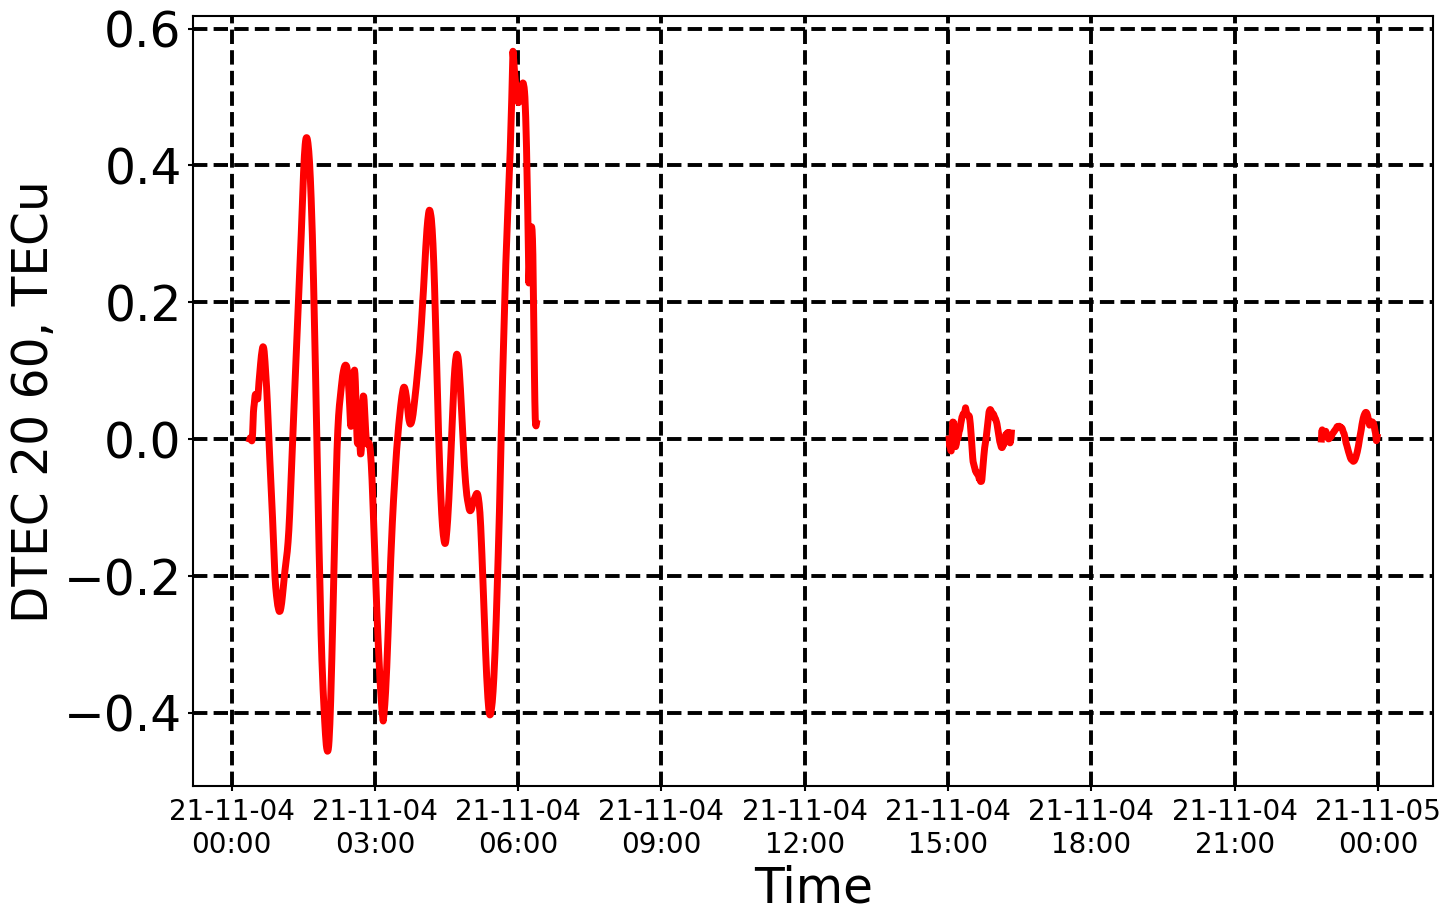

Plotted!
irkj
<KeysViewHDF5 ['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G30', 'G31', 'G32', 'R01', 'R02', 'R04', 'R05', 'R08', 'R13', 'R14', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R24']>
<KeysViewHDF5 ['azimuth', 'dtec_10_20', 'dtec_20_60', 'dtec_2_10', 'elevation', 'roti', 'sip_larc', 'sip_lat', 'sip_lon', 'tec', 'tec_adjusted', 'timestamp']>


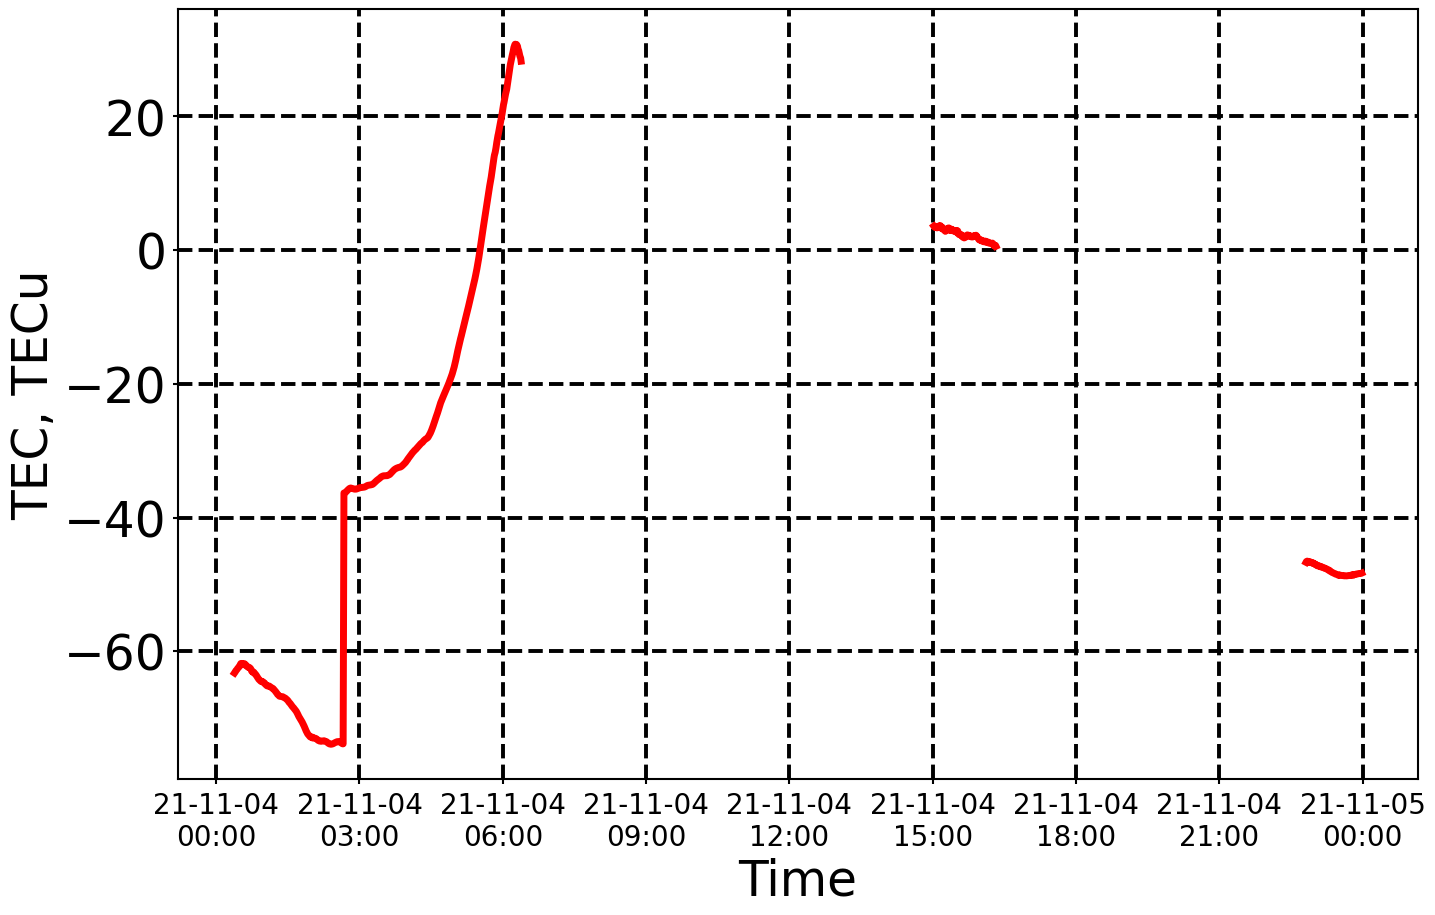

Plotted!
irkj
<KeysViewHDF5 ['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G29', 'G30', 'G31', 'G32', 'R01', 'R02', 'R04', 'R05', 'R08', 'R13', 'R14', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R24']>
<KeysViewHDF5 ['azimuth', 'dtec_10_20', 'dtec_20_60', 'dtec_2_10', 'elevation', 'roti', 'sip_larc', 'sip_lat', 'sip_lon', 'tec', 'tec_adjusted', 'timestamp']>


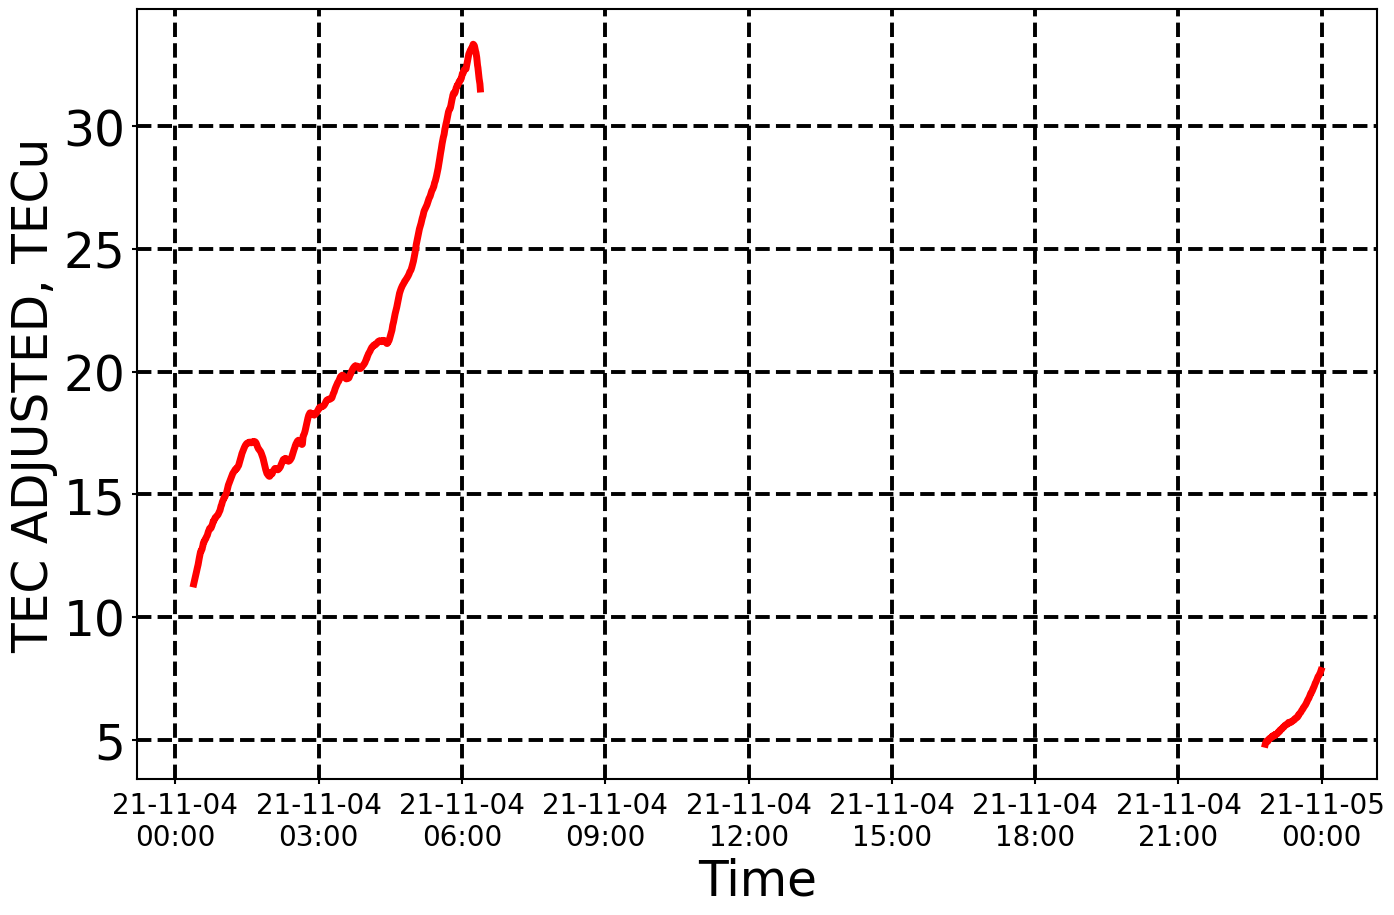

Plotted!


In [90]:
#Plot all available data products
names = ['roti','dtec_2_10','dtec_10_20','dtec_20_60','tec','tec_adjusted']
for i in names:
    data_plotter(taking_data_series(file, sat, i),i)